In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://raw.githubusercontent.com/pranta-iitp/Real-Estate-Property-Price-Prediction-Project/main/missing_values_imputed_data.csv"
df = pd.read_csv(base_url)

In [3]:
df.sample(3)

,property_type,society,sector,price,pricePerSqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score,area_per_bedroom
1631,flat,mapsko mount ville,sector 79,1.50,8264.0,3,4,3+,11.0,Relatively New,1416.0,0,0,0,0,1,1,158,605.000000
161,flat,godrej oasis,sector 88a,1.50,8108.0,3,3,3+,11.0,New Property,1674.0,0,0,0,0,0,0,51,616.666667
1783,flat,emaar mgf emerald floors premier,sector 65,2.85,14430.0,4,4,3,2.0,Relatively New,1975.0,1,0,0,0,1,0,24,493.750000


In [4]:
# All columns are needed for training. So we drop some columns
train_df = df.drop(columns=['society','pricePerSqft','area_per_bedroom'])

#### We will select important features from the existing to increase efficiency of our model.

#### Column: luxury_score
* We will create another column luxury_category, where we will divide luxury_score into 3 categories - Low, Medium and High

In [5]:
df['luxury_score'].describe().T

,luxury_score
count,3499.000000
mean,82.456130
std,60.776498
min,0.000000
25%,38.000000
50%,69.000000
75%,127.000000
max,205.000000


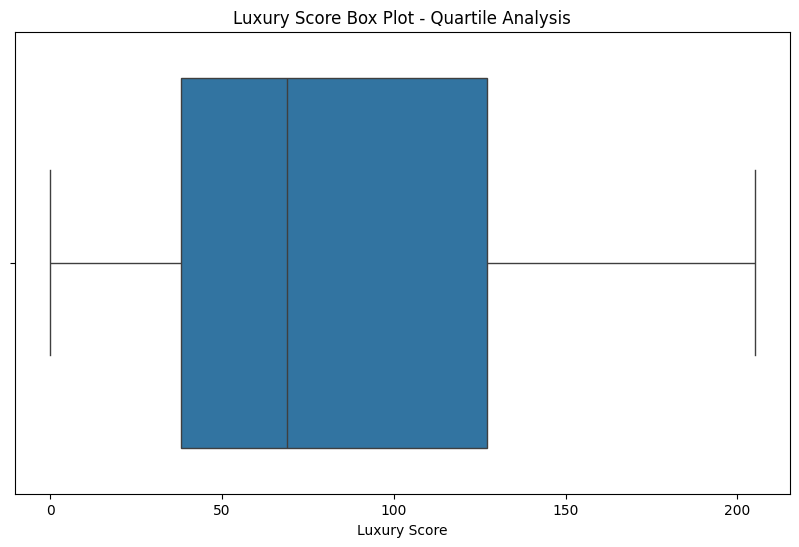

Quartile-based ranges:
Low: 0 to 38
Medium: 38 to 127
High: 127 to 205


In [6]:
# Box plot to see quartiles and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['luxury_score'])
plt.title('Luxury Score Box Plot - Quartile Analysis')
plt.xlabel('Luxury Score')
plt.show()

# Get quartile values for category boundaries
Q1 = df['luxury_score'].quantile(0.25)
Q2 = df['luxury_score'].quantile(0.50)  # Median
Q3 = df['luxury_score'].quantile(0.75)

print(f"Quartile-based ranges:")
print(f"Low: 0 to {Q1:.0f}")
print(f"Medium: {Q1:.0f} to {Q3:.0f}")
print(f"High: {Q3:.0f} to {df['luxury_score'].max():.0f}")


In [7]:
def categorize_luxury(score):
    if 0 <= score < 40:
        return "Low"
    elif 40 <= score < 150:
        return "Medium"
    elif 150 <= score <= 205:
        return "High"
    else:
        return None
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [8]:
train_df.sample(3)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score,luxury_category
2686,flat,sector 82a,1.25,3,2,3,2.0,Relatively New,1667.0,1,0,0,1,0,1,98,Medium
2781,flat,sector 21,0.80,2,2,2,6.0,Old Property,1256.0,0,0,0,0,0,1,0,Low
1933,flat,sector 51,2.10,4,4,3,1.0,Relatively New,2300.0,0,0,0,0,0,0,77,Medium


#### Column: floorNum
* We will create another column floor_category, where we will divide floorNum into 3 categories - Low, Medium and High

In [9]:
df['floorNum'].describe().T

,floorNum
count,3499.000000
mean,6.957988
std,6.058671
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


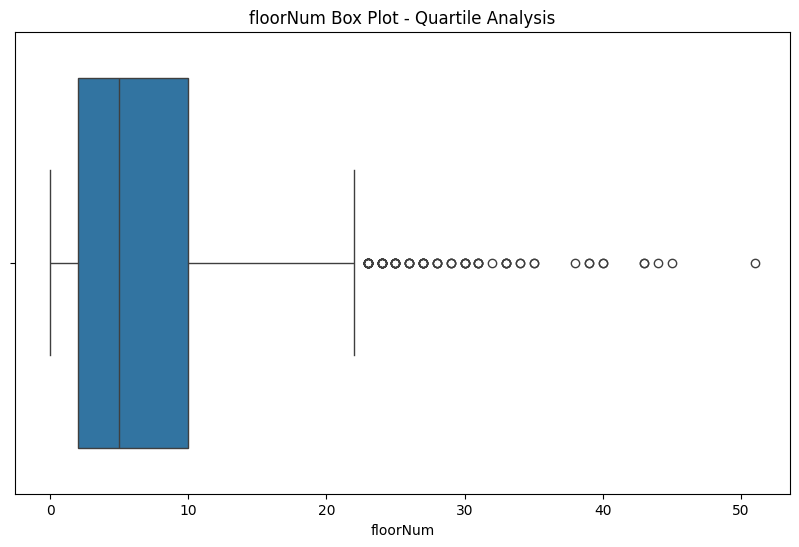

Quartile-based ranges:
Low: 0 to 2
Medium: 2 to 10
High: 10 to 51


In [10]:
# Box plot to see quartiles and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['floorNum'])
plt.title('floorNum Box Plot - Quartile Analysis')
plt.xlabel('floorNum')
plt.show()

# Get quartile values for category boundaries
Q1 = df['floorNum'].quantile(0.25)
Q2 = df['floorNum'].quantile(0.50)  # Median
Q3 = df['floorNum'].quantile(0.75)

print(f"Quartile-based ranges:")
print(f"Low: 0 to {Q1:.0f}")
print(f"Medium: {Q1:.0f} to {Q3:.0f}")
print(f"High: {Q3:.0f} to {df['floorNum'].max():.0f}")


In [11]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [12]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [13]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_category,floor_category
814,flat,sector 102,2.00,3,3,3,Relatively New,1676.0,0,0,0,0,0,0,Medium,Mid Floor
1110,flat,sector 103,0.23,1,1,1,Relatively New,400.0,0,0,0,0,0,0,Low,Mid Floor
2928,house,sector 109,12.50,5,6,3,Relatively New,4500.0,1,0,1,1,1,0,Medium,Mid Floor
2689,flat,sector 85,2.70,4,4,3+,New Property,3151.0,0,0,0,0,0,0,Low,High Floor
2309,flat,sector 61,1.55,2,2,1,Under Construction,1041.0,1,0,0,0,0,0,Medium,Mid Floor


#### Feature Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 2', 'sector 21',
       'sector 22', 'sector 23', 'sector 24', 'sector 25', 'sector 26',
       'sector 27', 'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 33 road', 'sector 36', 'sector 36a',
       'sector 37', 'sector 37c', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 

In [15]:
X_label.shape

(3499, 15)

#### Technique 1 - Correlation Analysis

<Axes: >

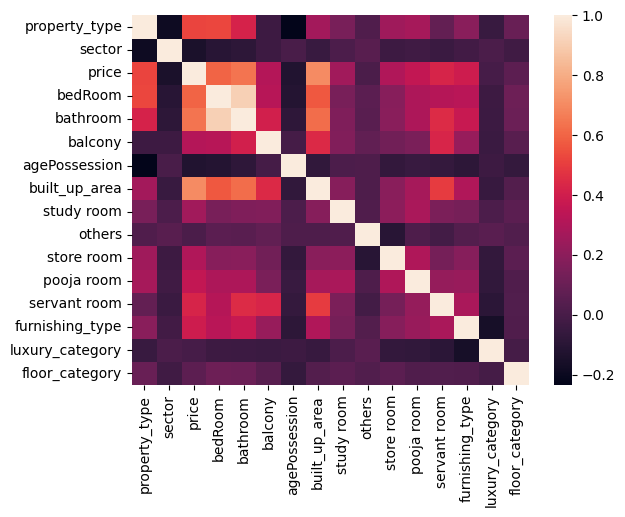

In [16]:
sns.heatmap(data_label_encoded.corr())

In [17]:
# Complete correlation analysis with proper column naming
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})

# Now sort by correlation coefficient (this will work)
fi_df1_sorted = fi_df1.sort_values(by='corr_coeff', ascending=False).reset_index(drop=True)
print(fi_df1_sorted)


            feature  corr_coeff
0             price    1.000000
1     built_up_area    0.701517
2          bathroom    0.641503
3           bedRoom    0.598173
4      servant room    0.421916
5   furnishing_type    0.391345
6        pooja room    0.355736
7           balcony    0.314884
8        store room    0.304544
9        study room    0.262045
10   floor_category    0.064087
11           others    0.007741
12  luxury_category   -0.007982
13    agePossession   -0.124117
14           sector   -0.147658


#### Technique 2 - Random Forest Feature Importance

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.611835
0,property_type,0.154584
1,sector,0.084277
11,servant room,0.034469
3,bathroom,0.029184
12,furnishing_type,0.016879
2,bedRoom,0.014700
4,balcony,0.012843
5,agePossession,0.011344
13,luxury_category,0.007434


#### Technique 3 - Gradient Boosting Feature importances

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.624034
0,property_type,0.151540
1,sector,0.079573
11,servant room,0.049609
3,bathroom,0.048734
2,bedRoom,0.025351
12,furnishing_type,0.009774
4,balcony,0.003809
5,agePossession,0.002556
13,luxury_category,0.002165


#### Technique 4 - Permutation Importance

In [20]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.741744
0,property_type,0.269562
1,sector,0.123747
3,bathroom,0.040571
11,servant room,0.025705
4,balcony,0.007674
12,furnishing_type,0.007267
7,study room,0.004898
2,bedRoom,0.004308
14,floor_category,0.003878


#### Technique 5 - LASSO

In [21]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.106964
0,property_type,0.708604
3,bathroom,0.577559
12,furnishing_type,0.271785
9,store room,0.167471
7,study room,0.164828
13,luxury_category,0.147828
11,servant room,0.115628
10,pooja room,0.104341
5,agePossession,0.000000


#### Technique 6 - RFE

In [22]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.610310
0,property_type,0.155429
1,sector,0.083371
11,servant room,0.037705
3,bathroom,0.026247
12,furnishing_type,0.015862
2,bedRoom,0.014280
4,balcony,0.012758
5,agePossession,0.011309
13,luxury_category,0.009716


#### Technique 7 - Linear Regression Weights

In [23]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.117935
0,property_type,0.734237
3,bathroom,0.700255
12,furnishing_type,0.279271
9,store room,0.170624
7,study room,0.170139
13,luxury_category,0.160914
11,servant room,0.111431
10,pooja room,0.109938
5,agePossession,0.011507


In [24]:
!pip install shap

In [25]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.58426952e-01, -1.57458213e-02, -2.32641128e-02, ...,
        -3.00909625e-02, -3.13809099e-02, -8.19605674e-03],
       [-1.76219704e-01,  1.03968989e-01, -2.83078494e-02, ...,
         1.65044300e-02, -1.38223593e-02, -1.40684741e-02],
       [-1.88840822e-01,  8.99798944e-03, -2.66868898e-02, ...,
        -2.66482478e-02,  1.09416995e-02,  3.11615818e-02],
       ...,
       [ 2.28558631e+00,  2.86093565e-01,  6.76695794e-02, ...,
        -1.28868478e-01, -1.77629542e-03, -1.67774396e-02],
       [ 1.52056361e+00,  6.32301044e-01, -4.15361777e-02, ...,
        -2.46894244e-02, -1.84320599e-02,  6.13707705e-03],
       [ 1.52907640e+00,  6.51654776e-01, -4.26494715e-02, ...,
        -3.21503606e-02,  4.21178652e-02,  1.98967022e-02]])

In [26]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.072189
0,property_type,0.479339
1,sector,0.295472
11,servant room,0.118334
3,bathroom,0.075925
12,furnishing_type,0.060336
4,balcony,0.045340
2,bedRoom,0.031330
14,floor_category,0.025305
5,agePossession,0.023687


In [27]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [28]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.147658,0.084277,0.079573,0.123747,-0.130004,0.083371,-0.138104,0.295472
bedRoom,0.598173,0.014700,0.025351,0.004308,-0.231051,0.014280,-0.368050,0.031330
bathroom,0.641503,0.029184,0.048734,0.040571,0.577559,0.026247,0.700255,0.075925
balcony,0.314884,0.012843,0.003809,0.007674,-0.000000,0.012758,-0.018404,0.045340
agePossession,-0.124117,0.011344,0.002556,0.002060,0.000000,0.011309,0.011507,0.023687
built_up_area,0.701517,0.611835,0.624034,0.741744,1.106964,0.610310,1.117935,1.072189
study room,0.262045,0.004117,0.000200,0.004898,0.164828,0.004428,0.170139,0.009170
others,0.007741,0.002806,0.000277,-0.000390,-0.024543,0.002904,-0.033132,0.007721
store room,0.304544,0.003775,0.001882,0.000348,0.167471,0.004025,0.170624,0.009467


In [29]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [30]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.709007
sector,0.116844
servant room,0.047221
bathroom,0.041435
furnishing_type,0.018247
bedRoom,0.017200
balcony,0.013573
agePossession,0.009016
luxury_category,0.007239


#### It looks like the columns - 'pooja room', 'store room', 'others' are less useful for prediction. So we will compute the R2 score with the columns and without the columns. Then we will proceed further.

In [31]:
# with all the cols
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [32]:
scores.mean()

np.float64(0.6556658385623821)

In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'store room', 'others']), y_label, cv=5, scoring='r2')

In [34]:
scores.mean()

np.float64(0.65898166276285)

#### Both scores are almost same. So we drop those columns and we will train model without those columns

In [35]:
export_df = train_df.drop(columns=['pooja room', 'store room', 'others'])
#export_df['price'] = y_label
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)
export_df

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,furnishing_type,luxury_category,floor_category
0,flat,sector 7,0.45,2,2,1,Relatively New,1000.0,0,0,0,Low,Mid Floor
1,flat,sector 3,0.50,2,2,1,Old Property,722.0,0,0,1,Low,Low Floor
2,flat,sector 33,0.40,2,2,3,New Property,661.0,0,0,0,Medium,High Floor
3,flat,sector 61,1.47,2,2,2,Under Construction,1333.0,1,0,0,Medium,Low Floor
4,flat,sector 92,0.70,2,2,3,Under Construction,1217.0,1,0,0,Low,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,house,sector 55,3.10,5,4,3+,Moderately Old,1548.0,0,1,1,Medium,Low Floor
3495,house,sector 57,4.75,3,3,3,Moderately Old,1650.0,0,0,1,Medium,Low Floor
3496,house,sector 26,5.50,4,4,3,Moderately Old,1800.0,1,1,0,Medium,Low Floor
3497,house,sector 25,4.25,3,2,3,Old Property,1350.0,1,0,0,Low,Low Floor
